# Data Collection

## Outline
* HTTP requests
* API requests and tokens
* Web Scraping and Crawling
* Parsing HTML

## Collecting Data

* Often the data you need doesn't exist in 'clean' csv files
* Solution: collect your own data!
    - Design your own experiment and collection (e.g. surveys, experiments).
    - Find related data on the internet

## Data on the Internet

* The Internet contains *large* amounts of historical record:
    - archived record of events in the world (e.g. news stories)
    - human behaviors on the Internet (e.g. social network behaviors)
* Data for many natural experiments available for consumption

## How to collect data from the Internet

* Use a "data request endpoint" (i.e. published API)
* Scrape and crawl content from web-pages.

Both communicate with content via HTTP requests!

## HTTP

* HyperText Transfer Protocol: is a *request-response* protocol 
* Allows one computer to talk to another over the Internet. 
* Used to fetch data from servers hosting web-content ('web servers').

Understanding what it is and how the protocol works in the first step to understanding how things work on Internet.

## Request-response model

HTTP follows the standard client - server model (or request - response). 

* Customer - Bank analogy
* Web browser that you use are `clients` to HTTP
* Youtube, Facebook, etc are `servers` that are sitting somewhere else.


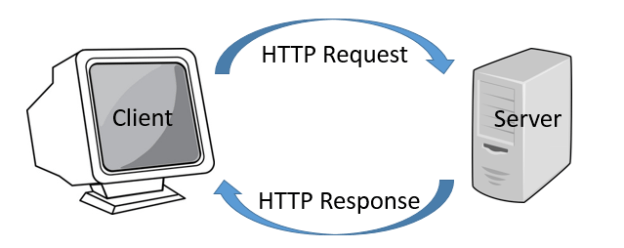

## Request-response model

When a request is sent to view content on a web-page:
* The server must process your request (prepare data for response)
* Send content from the the server to the client in its response.

This process requires computational resources for the server!

### Anecdote: Web-page hosting

* 15 year old makes a web-page that allows a user to:
    1. type in their name (client request)
    2. and receive a picture their (name's) spirit animal (server response).
* This requires a server-side 'look-up' of a picture for a given name.
* Hit Reddit front-page; $15,000 bill from cloud provider!


### Anecdote: Web-page hosting

Moral: every time you view a page, it costs the page owner money!

* Be mindful of your impact when collecting data from the Internet.

# HTTP Requests

## Making HTTP requests using `curl`

[`curl`](https://curl.haxx.se/docs/httpscripting.html) is a command-line tools that sends HTTP requests like a browser.

1. The client, curl, sends a HTTP request. 
2. The request contains a method (like GET, POST, HEAD etc)
3. The HTTP server responds with 
    - a status line (indicating if things went well), 
    - response headers 
    - a response body (usually) including the data.

# Request methods

* GET: is used to request data from a specified resource.

* HEAD: is almost identical to GET, but without the response body. HEAD requests are useful for checking what a GET request will return before actually making a GET request - like before downloading a large file or response body.

* DELETE: deletes the specified resource.

* POST: is used to send data to the server, for example, customer information, file upload, etc. using HTML forms.

* a few more

### Example: GET

* `curl` by default issues a `GET`:

```
curl -v https://httpbin.org/html   (`-v` is short for verbose)
```

* Now type the same URL in the browser

### Example: POST

* a POST request with `curl` that sends 'Humpty Dumpty' as the parameter 'name'.
```
curl -d 'name=Humpty Dumpty' https://httpbin.org/post   (`-d` is short for POST)
```

* You cannot send a POST directly in the url of a browser.


## GET vs POST

* GET can also send data to the server. With the GET method, the data is appended to the URL with a special syntax:
    * `http://cofe.ru/forum?id=666`
    * This method is good when you're sending small amounts of data. 
    * Also there might be cases you want parameters to be 'visible' in the URL (e.g. for crawlers)
    
* In POST, the URL visible to the user is just `http://cofe.ru/forum`. 
    * and any parameter setting is "hidden" in the communication with the server. 
    * It is not encrypted, just hidden.

* reference: https://www.w3schools.com/tags/ref_httpmethods.asp

# Requests

* `requests` is a python package that allows you to use Python to interact with the Internet!  
* There are other packages (e.g. `urllib`), but `requests` is the easiest to use.

In fact, to get the UCSD home page is a simple as
```
import requests
text = requests.get("https://ucsd.edu").text
```


In [1]:
import requests

# GET request (default)
url = "https://ucsd.edu"
resp = requests.get(url)

In [2]:
# response object
resp

<Response [200]>

In [3]:
# body of response
resp.text

'<!DOCTYPE html>\n<html lang="en">\n  <head>\n  \n  \n\n \n\n\n\n\n\n    <meta charset="utf-8"/>\n    <meta content="IE=edge" http-equiv="X-UA-Compatible"/>\n    <meta content="width=device-width, initial-scale=1" name="viewport"/>\n    <title>University of California San Diego</title>\n    <meta content="University of California, San Diego" name="ORGANIZATION"/>\n    <meta content="index,follow,noarchive" name="robots"/>\n    <meta content="UCSD" name="SITE"/>\n    <meta content="University of California San Diego" name="PAGETITLE"/>\n    <meta content="The University California, San Diego is one of the world\'s leading public research universities, located in beautiful La Jolla, California." name="DESCRIPTION"/>\n    <link href="favicon.ico" rel="icon"/>\n\n\n    \n  \n\n\n\n\n<!-- Site-specific CSS files -->\n    \n  <link href="https://ucsd.edu/_resources/css/vendor/brix_sans.css" rel="stylesheet" type="text/css"/>\n  \n  <!-- CSS complied from style overrides -->\n  <link href="//

In [4]:
resp.request.url

'https://ucsd.edu/'

In [5]:
# post data with in a dictionary (json!)
post_response = requests.post("https://httpbin.org/post",
                              data={'name': 'Humpty Dumpty'})
post_response

<Response [200]>

In [6]:
post_response.headers

{'Access-Control-Allow-Credentials': 'true', 'Access-Control-Allow-Origin': '*', 'Content-Encoding': 'gzip', 'Content-Type': 'application/json', 'Date': 'Thu, 21 Mar 2019 20:53:26 GMT', 'Server': 'nginx', 'Content-Length': '271', 'Connection': 'keep-alive'}

In [7]:
print(post_response.text)

{
  "args": {}, 
  "data": "", 
  "files": {}, 
  "form": {
    "name": "Humpty Dumpty"
  }, 
  "headers": {
    "Accept": "*/*", 
    "Accept-Encoding": "gzip, deflate", 
    "Content-Length": "18", 
    "Content-Type": "application/x-www-form-urlencoded", 
    "Host": "httpbin.org", 
    "User-Agent": "python-requests/2.21.0"
  }, 
  "json": null, 
  "origin": "137.110.53.59, 137.110.53.59", 
  "url": "https://httpbin.org/post"
}



# Status Codes

* When we request data from a website, the server responds with a HTTP status code.  
* The most common response is `200` which means things went well.  
* Other times you will get a different status code saying something else happened
    - you might be familiar with a `404` which means the page wasn't found.

* This great site lists http status codes: 
    - [https://httpstat.us/](https://httpstat.us/).

* But better yet, it has example sites that return a certain code, so you can test!  
    - So, for example, https://httpstat.us/404 returns a `404`

In [8]:
import requests

r = requests.get("https://httpstat.us/404")
print(r.status_code)

404


In [9]:
r = requests.get("https://httpstat.us/404")
r.status_code
r.text

'404 Not Found'

You can check if the call went ok with `r.ok` which returns a boolean.

After you run the code below, read up on each of the status codes at [https://httpstat.us/](https://httpstat.us/).

In [10]:
statusCodes = [200, 404, 403, 429]

for statusCode in statusCodes:
    r = requests.get("https://httpstat.us/" + str(statusCode))
    print(str(statusCode) + " ok: " + str(r.ok))

200 ok: True
404 ok: False
403 ok: False
429 ok: False


In [11]:
# Or raise an exception when there is a not-ok status code

r = requests.get("https://httpstat.us/404")
r.raise_for_status()

HTTPError: 404 Client Error: Not Found for url: https://httpstat.us/404

# The data formats of the Internet

Working with Internet communication, you will need to parse the data formats of the internet.
* GET: response body is usually HTML
* POST: response body is usually JSON

## JSON from the Internet

* JSON is a python dictionary. How is it different?
* Always use `json.loads` and ***never*** evaluate the text as a dictionary!
* You generally cannot trust the data you receive from HTTP requests.

In [ ]:
# json stored as string
post_response.text

In [ ]:
# ALWAYS parse using json library
import json
json.loads(post_response.text)

In [ ]:
malicious = open('response.json').read()

In [ ]:
# print the text of the malicious request
print(malicious)

In [ ]:
# Eval it to a dictionary (BAD, DON'T DO THIS)
eval(malicious)

In [ ]:
# Parse with JSON library (GOOD)
json.loads(malicious)

### Handling 'unfamiliar' data
* Never trust data from an unfamiliar site
* **Never** use eval on 'raw' data that you didn't create!
* The json data format needs to be *parsed*, not evaluated as a dictionary.
    - It was designed with safety in mind!

# Getting data from the Internet

## Programmatic requests

* We learned how to use python `requests` to exchange data via HTTP.
* There are two ways of collecting data with requests:
    * Use a published API (Application Programming Interface)
    * 'Screen Scrape' a page to collect raw HTML as in a browser
    
* Takeaway: *always use a published API whenever possible!

**Important**: stay out of trouble!

## APIs vs Scraping

* APIs are url endpoints dedicated for programmatic requests setup by the website host.

* **An endpoint** is a server route that is used to retrieve different data from the API. 

For example, the `/comments` endpoint on the Reddit API might retrieve information about comments, whereas the `/users` endpoint might retrieve data about users. 

To access them, you would add the endpoint to the base url of the API.
- APIs allow for authentication (and access to sensitive data).
- APIs have more reliable data that is easier to parse.
- APIs allow hosts to monitor usage and protect their website.


## APIs vs Scraping
    
* Scraping mimics the browser and is uncontrolled like normal browsing.
    - Many rapid requests to a small site can take down the host server.
    - Many rapid requests to a small site can cost the owner money
    - Always be respectful and responsible when scraping!

### Should I use an API or build a scraper?

Taken from [a journalist's talk](http://www.storybench.org/to-scrape-or-not-to-scrape-the-technical-and-ethical-challenges-of-collecting-data-off-the-web/)
<img src="flowchart_final.jpeg" width="75%">

## Why APIs?

* The data is changing quickly. 
    - E.g. stock price data: don't want to scrape a page every few minutes!
* You want a small piece of a much larger set of data. 
    - What if you want to just pull your own comments on Reddit? (all is too much)
    - What if you want your Google GPS history? (private)
* You want usability and stability, not changing HTML requiring translation

## API requests

* API requests are just GET/POST requests to a specially maintained URL.
* Below is `okpy` (DSC 10) grading API

`https://okpy.github.io/documentation/ok-api.html`


In [ ]:
# Make a get request 
response = requests.get("https://okpy.org/api/v3/")

# Print the status code of the response. Are we in trouble?
print(response.status_code)

In [ ]:
# Make a get request 
response = requests.get("https://okpy.org/api/v3.json")

# Print the status code of the response. and now??
print(response.status_code)

In [ ]:
# Make a get request 
response = requests.get("https://okpy.org/api/v3/version/")

# Print the status code of the response. and now??
print(response.status_code)
print(response.content)

print(json.loads(response.content))

In [ ]:
# read the documentation
# python3 ok --get-token

### Submit an assignment

<img src="okpy_request.png" width="50%">

### Submit a score after grading the HW:

<img src="okpy_get.png" width="50%">

## Why Scraping?

* Not all scraping is unethical!
* Google scrapes pages to make them searchable
* Making an API takes work -- scraping may be the only way!

How do you scrape ethically and responsibly?

### Best practices for scraping

1. Send requests slowly; be upfront about what you are doing!
2. Respect the policy published in the page's `robots.txt` file
3. Don't spoof your UserAgent (or try to trick the server into thinking you are a person)
4. Read the Terms of Service for the site and follow it.

### Consequences of irresponsible scraping

* Too many requests may cause the server will block your IP Address!
    - Everyone in your dorm might lose access to Google! (Seriously!)
    - Bad enough? May bring legal trouble!
* Too many requests may take down the website
    - A scraper (journalist) took down the Cook County Inmate Locater
    - Ethical implication: inmate's families couldn't contact them while the site was down.

## `Robots.txt`

* Many sites have a published policy allowing or disallowing automatic access to their site.  
* This policy is in a text file `robots.txt`: learn more about it [here](https://moz.com/learn/seo/robotstxt).
* The code below checks if the `robot.txt` file prohibits you from scraping the site.  
* Remember the best practices above - just because you aren't prohibited by the robots policy doesn't mean you can scrape the site!

In [ ]:
from urllib.parse import urlparse
import urllib.robotparser

# This code checks the robots.txt file
def canFetch(url):

    parsed_uri = urlparse(url)
    domain = '{uri.scheme}://{uri.netloc}/'.format(uri=parsed_uri)

    rp = urllib.robotparser.RobotFileParser()
    rp.set_url(domain + "/robots.txt")
    try:
        rp.read()
        canFetchBool = rp.can_fetch("*", url)
    except:
        canFetchBool = None
    
    return canFetchBool

In [ ]:
url = "https://slate.com/bullpen/"
canFetch(url)

In [ ]:
url = "http://dsc.ucsd.edu/node/10"
canFetch(url)

## Getting the HTML

* GET requests result in HTML; What does this look like?
* Let's see what is on the UCSD Data Science Events page.

In [ ]:
url = "http://dsc.ucsd.edu/node/10"

r = requests.get(url)
    
urlText = r.text

Nchars = 10000
print(urlText[:Nchars]) # Print the first 500 characters
print("\n\n... " + str(len(urlText)-Nchars) + " additional characters")


In [ ]:
len(r.text)

Wow, that is gross looking!  It is **raw** HTML, which the browser uses to make the viewable site.

## What is HTML?

* HTML (HyperText Markup Language) is the most basic building block of the Web. It describes and defines the content of a webpage along with the basic layout of the webpage.

* HTML markup includes special "elements" (tags) such as 
    * `<head>, <title>, <body>, <p>, <div>, <img>`,.....
    
* Below is a visualization of an HTML page structure: 

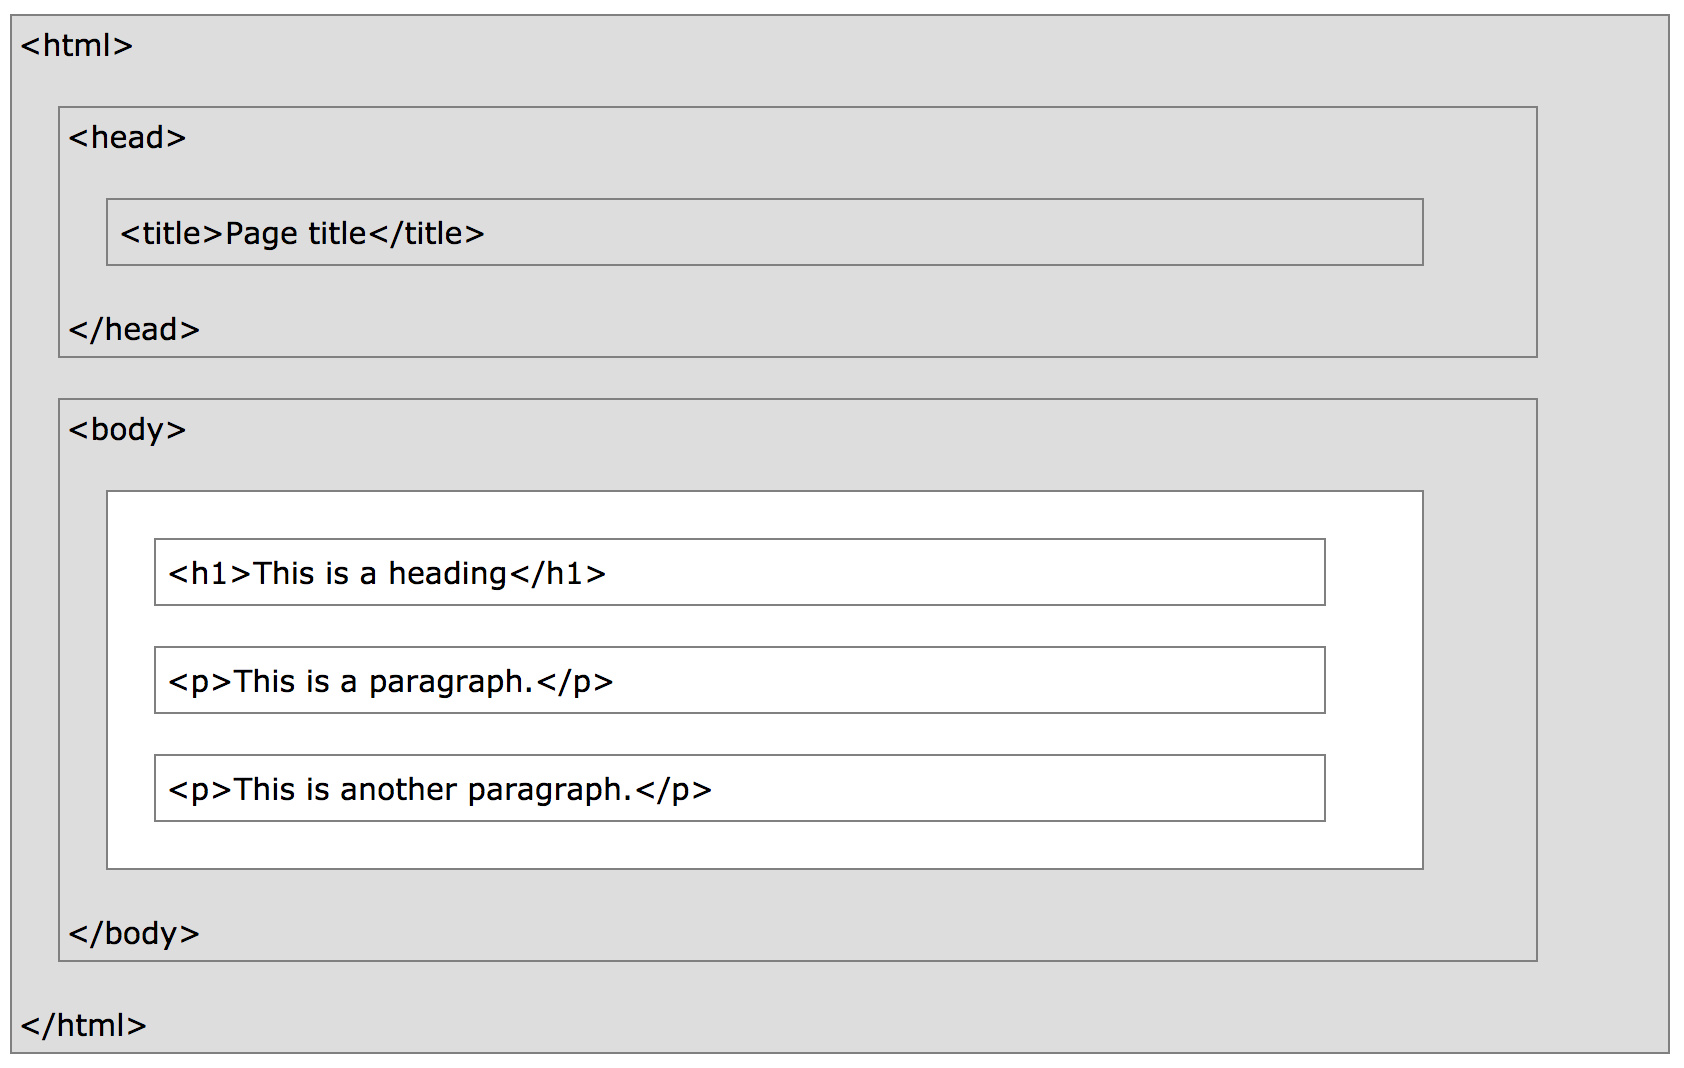

More for reference: http://fab.academany.org/2018/labs/fablaboshanghai/students/bob-wu/Fabclass/week2_project_management/HTML.html


In [ ]:
# open a file via python

import webbrowser
import os
webbrowser.open('file://' + os.path.realpath("lec10.html"));


##  Images and Hyperlinks

* Tag for a picture (can use a link to the image):

`<img src="HumDum.png" alt="Humbpty Dumpty">`

* Tag for a hyperlink: 

  `<a href="https://ucsd.edu/">Visit our page!</a>`


In [ ]:
import webbrowser
import os
webbrowser.open('file://' + os.path.realpath("lec10_pic_ref.html"));

# the size of the images can be edited. 

# Cleaning

* Now we have an idea what the basic structure of the HTML looks like, we can start cleaning it. 

* To process it we can use [Beautiful Soup 4](https://www.crummy.com/software/BeautifulSoup/bs4/doc/).

**Warning:** BeautifulSoup has changed quite a bit between versions, so make sure you are looking at documentation for the version you are using (4 here).

In [ ]:
# url = "http://dsc.ucsd.edu/node/10"
# r = requests.get(url)   
# urlText = r.text


from bs4 import BeautifulSoup
soup = BeautifulSoup(urlText, 'html.parser')
#soup

In [ ]:
# we can extract the title of the document

soup.title
# soup.title.string

In [ ]:
# we can extract the first paragraph 

soup.p

# open link in the browser, right click and "page source". Can you find <p> tags?
# and hyperlinks

In [ ]:
# Grab all the links

all_links  = soup.find_all('a')
all_links
#type(all_links)

In [ ]:
# print all the links
for link in soup.find_all('a'):
    print("new link: " + link.text+ "\n")
    

In [ ]:
for link in soup.find_all('a'):
    print("new link: " + str(link.get('href'))+ "\n")
 

In [ ]:
# Show the text
print(soup.get_text())